In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
norms = pd.read_csv('../../data/raw/psychNorms.zip', index_col=0, compression='zip', low_memory=False)
norm_metadata = pd.read_csv('../../data/raw/psychNorms_metadata.csv', index_col='norm')
norm_metadata['associated_embed'] = norm_metadata['associated_embed'].astype(str)
norms

,Freq_HAL,Freq_KF,Freq_SUBTLEXUS,Freq_SUBTLEXUK,Freq_Blog,Freq_Twitter,Freq_News,Freq_CobW,Freq_CobS,CD_SUBTLEXUS,...,reproduction_vanarsdall,person_vanarsdall,goals_vanarsdall,movement_vanarsdall,concreteness_vanarsdall,familiarity_vanarsdall,imageability_vanarsdall,familiarity_fear,aoa_fear,imageability_fear
'em,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3617,1.9138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'neath,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
're,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9031,1.6335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'shun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'tis,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4771,0.6021,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shrick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.62,4.38,2.93
post office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.79,3.07,5.29
fishing rod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.29,3.38,5.64
March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.43,2.76,3.50


In [4]:
# Identifying count-based norms to investigate which need log transformation
numeric_norms = norm_metadata.query('type == "numeric"').index
count_norms = [norm for norm in numeric_norms if norms[norm].dropna().apply(float.is_integer).all()]
norm_metadata.loc[count_norms]

,description,citation,category,associated_embed,type,n_ratings
norm,,,,,,
Nsenses_WordNet,Number of senses based on the WordNet database.,"Miller, G. A. (1995). ""WordNet: a lexical data...",semantic_diversity,nan,numeric,40480
Nsenses_Wordsmyth,Number of senses based on the Wordsmyth dictio...,"Rice, C. A., et al. (2019). ""A comparison of h...",semantic_diversity,nan,numeric,534
Nmeanings_Wordsmyth,Number of meanings based on the Wordsmyth dict...,"Rice, C. A., et al. (2019). ""A comparison of h...",semantic_diversity,nan,numeric,534
Nmeanings_Websters,Number of meanings based on the Websters dicti...,"Gao, C., Shinkareva, S. V., & Desai, R. H. ""SC...",semantic_diversity,nan,numeric,40945
NFeatures,Number of features listed for the word. This m...,"Buchanan, E. M., et al. (2019). ""English seman...",number_of_features,nan,numeric,4381
Sem_N,The number of semantic neighbors within a thre...,"Shaoul, C. and C. Westbury (2006). ""Word frequ...",semantic_neighborhood,nan,numeric,52008
Assoc_Freq_Token123,The number of times that a word is one of the ...,"De Deyne, S., et al. (2019). ""The “Small World...",semantic_neighborhood,PPMI_SVD_SWOW SGSoftMaxInput_SWOW SGSoftMaxOut...,numeric,29722
Cue_SetSize,The number of different responses or targets g...,"Nelson, D. L., et al. (2004). ""The University ...",semantic_neighborhood,nan,numeric,4954
likableness_anderson,Likableness ratings on a scale from 0 (least f...,"@article{anderson1968likableness,\n title={Li...",social/moral,nan,numeric,555


Nsenses_WordNet


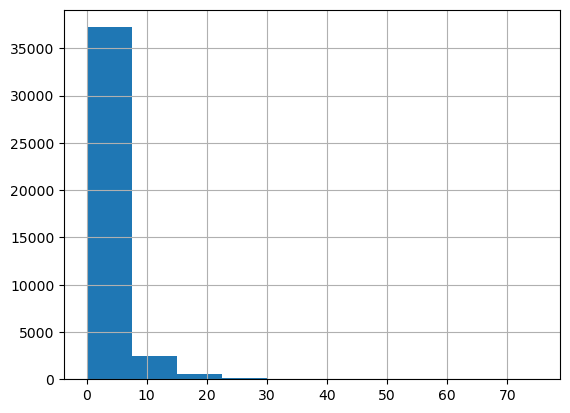

Nsenses_Wordsmyth


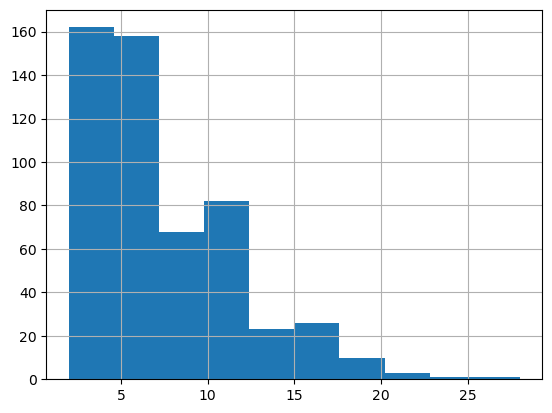

Nmeanings_Wordsmyth


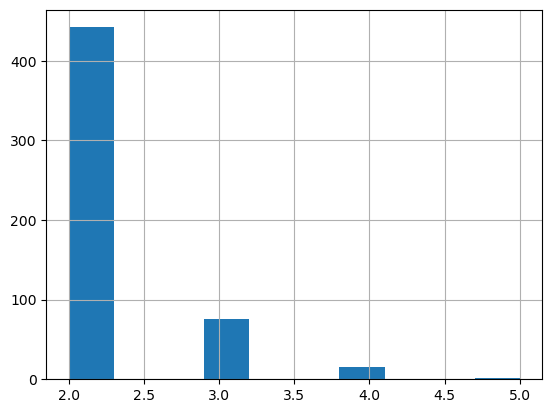

Nmeanings_Websters


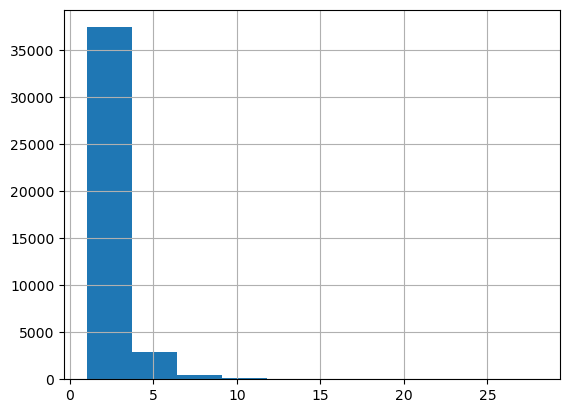

NFeatures


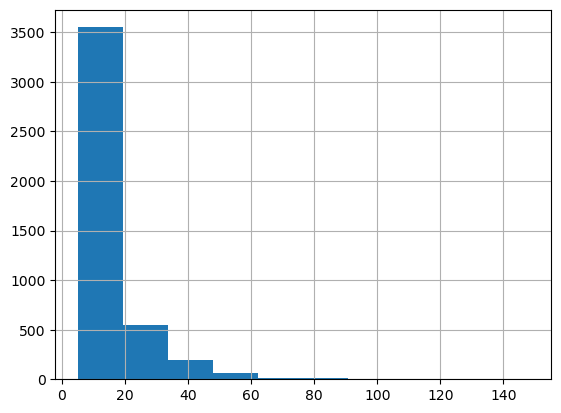

Sem_N


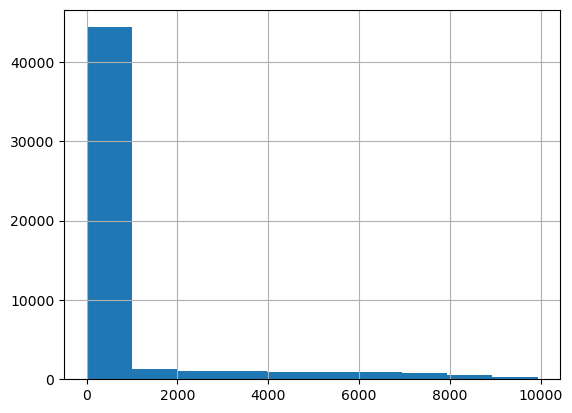

Assoc_Freq_Token123


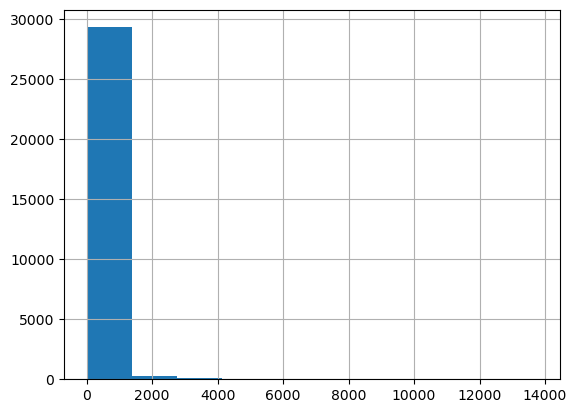

Cue_SetSize


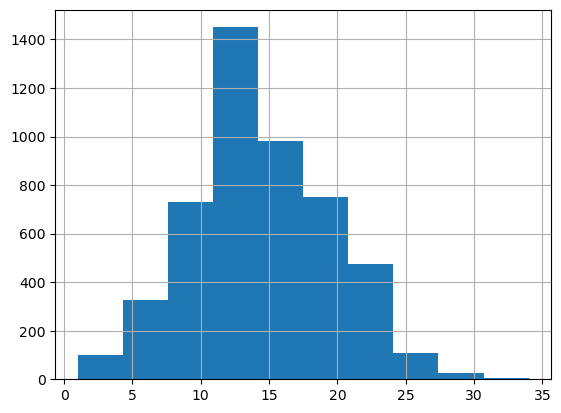

In [5]:
count_norms = [
    'Nsenses_WordNet', 'Nsenses_Wordsmyth', 'Nmeanings_Wordsmyth', 'Nmeanings_Websters', 
    'NFeatures', 'Sem_N', 'Assoc_Freq_Token123', 'Cue_SetSize'
]


# Plots grid of the distributions of count-based norms
for norm in count_norms:
    print(norm)
    norms[norm].hist()
    plt.show()

Nsenses_WordNet


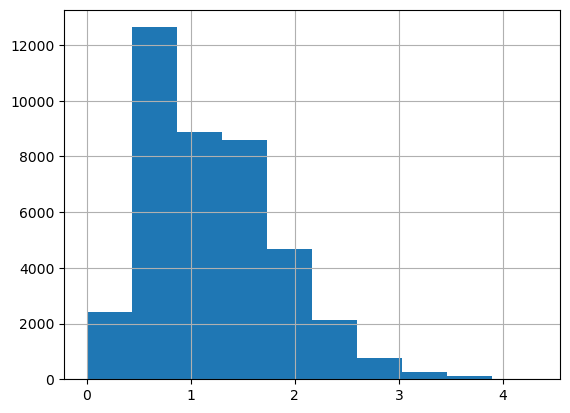

Nsenses_Wordsmyth


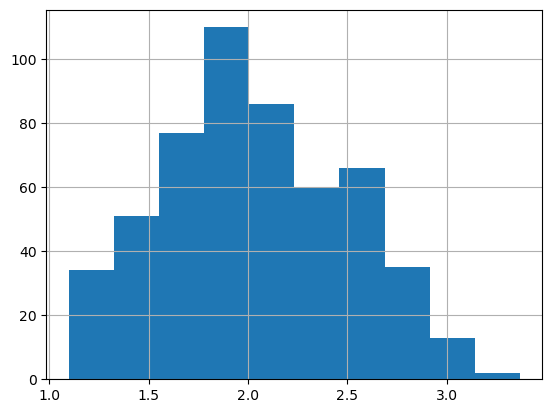

Nmeanings_Wordsmyth


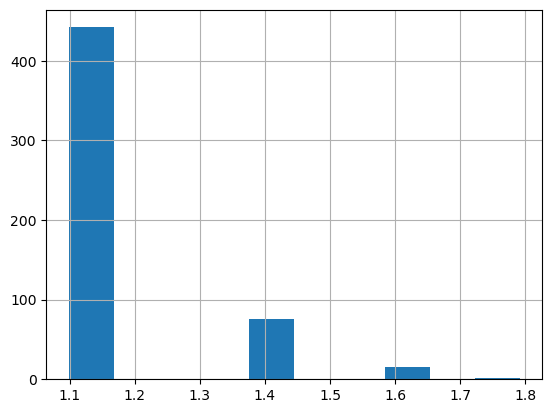

Nmeanings_Websters


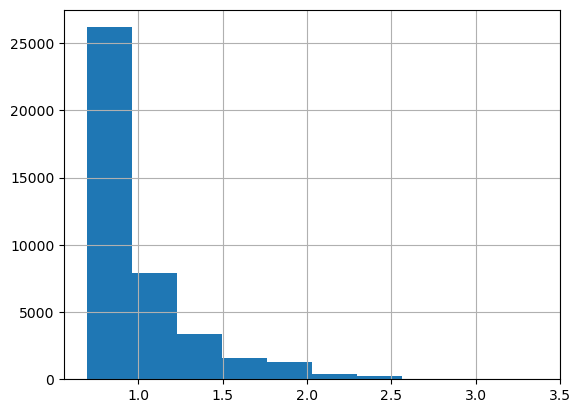

NFeatures


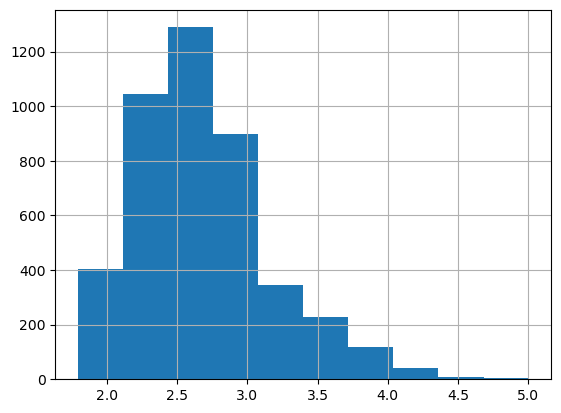

Sem_N


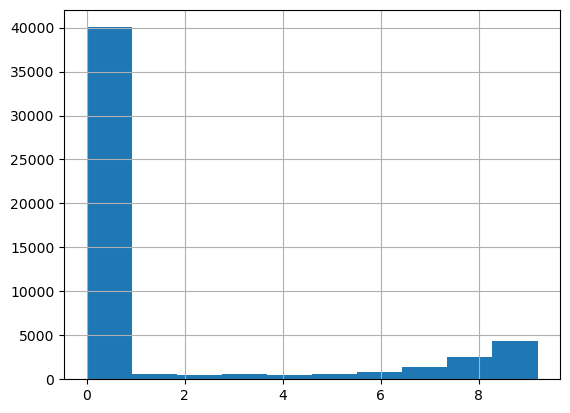

Assoc_Freq_Token123


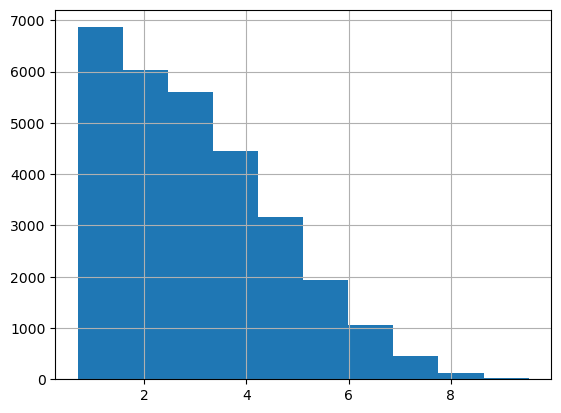

In [6]:
count_norms.remove('Cue_SetSize') # removing since distribution is normal

# Log transforming remaining count norms
norms[count_norms] = norms[count_norms].apply(np.log1p)

# Checking it worked
for norm in count_norms:
    print(norm)
    norms[norm].hist()
    plt.show()

In [8]:
# Saving count norms list as pickle
with open('../../data/processed/norms_to_log.pkl', 'wb') as f:
    pickle.dump(count_norms, f)